In [25]:
#Per Google Colab
#!git clone https://github.com/francescodesantis/corso_progetto.git

In [26]:
import os
#os.chdir('corso_progetto/statistica_esercitazione1') 
print(os.getcwd()) 

c:\Users\utente\Desktop\repos\corso_progetto\statistica_esercitazione1


In [27]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt


In [28]:
# Load MATLAB data
data = scipy.io.loadmat('Data_example1.mat')

In [29]:
type(data)

dict

In [30]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Group', 'Maximal_Force'])

In [31]:
print(data['__header__'])

b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Fri Nov 16 11:41:19 2018'


In [32]:
print(type(data['Group']))  # Check the type of 'Group'
print(data['Maximal_Force'])        # Print its contents

<class 'numpy.ndarray'>
[[26.        ]
 [22.66666667]
 [62.33333333]
 [26.        ]
 [27.33333333]
 [34.33333333]
 [29.33333333]
 [46.        ]
 [55.        ]
 [21.33333333]
 [38.66666667]
 [10.66666667]
 [46.66666667]
 [44.        ]
 [34.        ]
 [28.33333333]
 [34.        ]
 [21.        ]
 [26.        ]
 [37.33333333]
 [14.66666667]
 [22.        ]
 [30.        ]
 [27.33333333]
 [32.        ]
 [21.33333333]
 [28.        ]
 [50.66666667]
 [25.        ]
 [30.66666667]
 [19.33333333]
 [23.33333333]
 [19.33333333]
 [21.66666667]
 [ 4.66666667]
 [34.        ]
 [24.        ]
 [40.        ]
 [45.66666667]
 [22.33333333]
 [17.33333333]
 [17.        ]
 [30.66666667]
 [15.66666667]
 [27.66666667]
 [21.33333333]
 [12.66666667]
 [20.        ]
 [18.        ]
 [16.        ]
 [20.33333333]
 [36.66666667]
 [24.66666667]
 [31.33333333]
 [24.        ]
 [18.66666667]
 [61.        ]
 [17.33333333]
 [23.33333333]
 [29.33333333]
 [28.33333333]
 [41.33333333]
 [44.        ]
 [23.33333333]
 [34.66666667]
 

In [33]:
Maximal_Force = data['Maximal_Force']
Group = data['Group']

In [34]:
len(Maximal_Force)

108

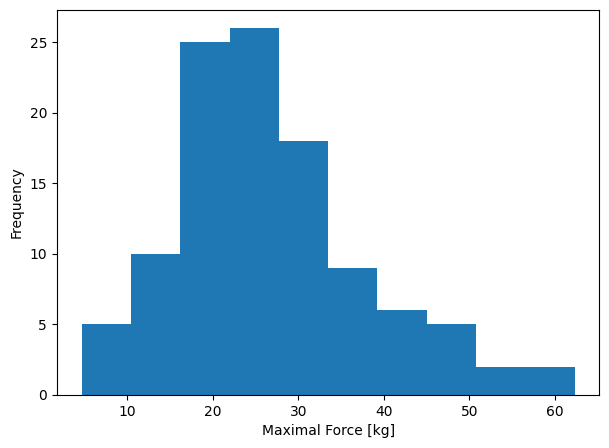

In [35]:
# Visualizzazione preliminare dei dati
plt.figure(1, figsize = (7,5))
plt.hist(Maximal_Force)
plt.xlabel("Maximal Force [kg]")
plt.ylabel("Frequency")
plt.show()

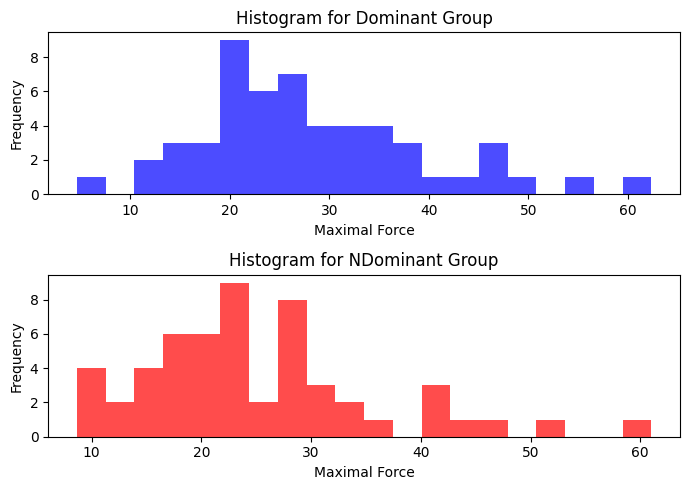

In [36]:
# Visualizzazione preliminare dei dati
# The Group == 'Dominant' expression checks each element of the Group array to see if it is equal to 'Dominant'.
#  This will return a Boolean array of the same size as Group, where each element is either
#  True (if the condition is met) or False (if it isn't).

fig, ax = plt.subplots(2, figsize=(7, 5))

# Histogram for Dominant group on first subplot
ax[0].hist(Maximal_Force[Group == 'Dominant'], bins=20, color='blue', alpha=0.7)
ax[0].set_title('Histogram for Dominant Group')
ax[0].set_xlabel('Maximal Force')
ax[0].set_ylabel('Frequency')

# Histogram for nDominant group on second subplot
ax[1].hist(Maximal_Force[Group == 'NDominant'], bins=20, color='red', alpha=0.7)
ax[1].set_title('Histogram for NDominant Group')
ax[1].set_xlabel('Maximal Force')
ax[1].set_ylabel('Frequency')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

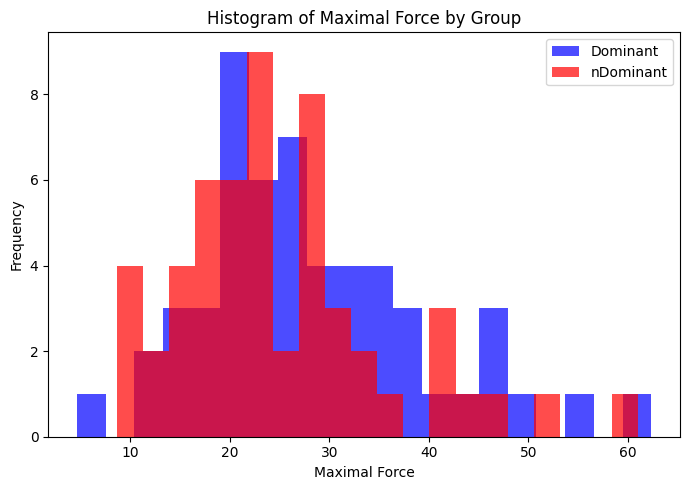

In [37]:
fig, ax = plt.subplots(figsize=(7, 5))

# Overlayed histograms with different colors and transparency
ax.hist(Maximal_Force[Group == 'Dominant'], bins=20, color='blue', alpha=0.7, label='Dominant')
ax.hist(Maximal_Force[Group == 'NDominant'], bins=20, color='red', alpha=0.7, label='nDominant')

# Add titles and labels
ax.set_title('Histogram of Maximal Force by Group')
ax.set_xlabel('Maximal Force')
ax.set_ylabel('Frequency')

# Add a legend to distinguish between the two groups
ax.legend()

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


The Group == 'Dominant' expression checks each element of the Group array to see if it is equal to 'Dominant'. This will return a Boolean array of the same size as Group, where each element is either True (if the condition is met) or False (if it isn't).

In [38]:
from scipy.stats import norm, mannwhitneyu, normaltest, shapiro

In [39]:
#help(shapiro)
help(normaltest)

Help on function normaltest in module scipy.stats._stats_py:

normaltest(a, axis=0, nan_policy='propagate', *, keepdims=False)
    Test whether a sample differs from a normal distribution.

    This function tests the null hypothesis that a sample comes
    from a normal distribution.  It is based on D'Agostino and
    Pearson's [1]_, [2]_ test that combines skew and kurtosis to
    produce an omnibus test of normality.

    Parameters
    ----------
    a : array_like
        The array containing the sample to be tested.
    axis : int or None, default: 0
        If an int, the axis of the input along which to compute the statistic.
        The statistic of each axis-slice (e.g. row) of the input will appear in a
        corresponding element of the output.
        If ``None``, the input will be raveled before computing the statistic.
    nan_policy : {'propagate', 'omit', 'raise'}
        Defines how to handle input NaNs.

        - ``propagate``: if a NaN is present in the axis slic

In [49]:
# I dati provengono da una distribuzione Gaussiana?
_,p = normaltest(Maximal_Force)
p

array([0.00033124])

In [41]:
#Definisco i valori per i due gruppi
Maximal_Force_D = Maximal_Force[:54]
Maximal_Force_ND = Maximal_Force[54:]

In [42]:
# I dati provengono da una distribuzione Gaussiana?
_,p = normaltest(Maximal_Force_D)
p

array([0.01977312])

In [43]:
# I dati provengono da una distribuzione Gaussiana?
_,p = normaltest(Maximal_Force_ND)
p

array([0.00223096])

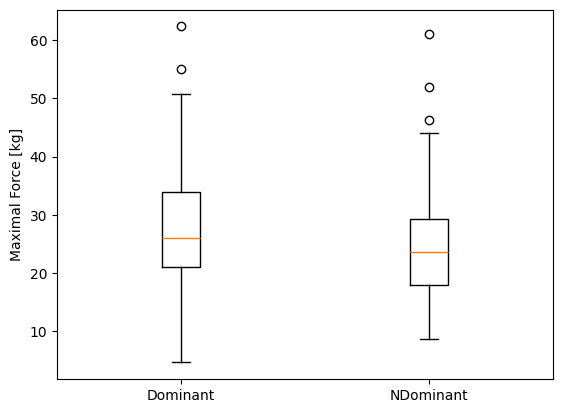

In [44]:
# Visualizzare i Dati con i boxplot
plt.figure()
plt.boxplot([Maximal_Force[Group=='Dominant'], Maximal_Force[Group=='NDominant']])
plt.ylabel('Maximal Force [kg]')
plt.xticks([1, 2], ['Dominant', 'NDominant'])
plt.show()

In [50]:
# Effettuo il test opportunamente selezionato
from scipy.stats import wilcoxon
_, p1 = wilcoxon(Maximal_Force_D, Maximal_Force_ND)
p1

array([1.78364824e-05])

In [51]:
if p1 < 0.05: 
    print("Reject H0")
else: 
    print("Fail to reject H0")


Reject H0
